# Effect of gap junctions on fast spiking interneurons driven by current injection

This notebook validates the old result that when FS neurons are driven by current injections we will see a synchronisation if there are also gap junctions coupling them together.

Here we create a network of FS neurons, then simulate them without gap junctions ('''gap_junctions_disabled=True'''). Then the gap junctions are manually inserted into the network, and the simulation is rerun this time with the gap junctions. In both cases the FS neurons are driven by current injections (and not synaptic inputs).

In [1]:
import os
os.environ["SNUDDA_DATA"] = "../../../../BasalGangliaData/data/"
assert os.path.isdir(os.getenv("SNUDDA_DATA")), f"You need to have BasalGangliaData installed for this example. You can run this example without it, but then do not execute this cell."

network_path = os.path.join("FS_network_3-cur-inj")

In [2]:
from snudda.init.init import SnuddaInit
cnc = SnuddaInit(struct_def={}, network_path=network_path, random_seed=1337)
cnc.define_striatum(num_dSPN=0, num_iSPN=0, num_FS=1050, num_LTS=0, num_ChIN=0,
                    volume_type="cube", side_len=230e-6, neuron_density=0.013*80500)
cnc.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: FS from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/fs
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing FS_network_3-cur-inj/network-config.json


In [3]:
from snudda import Snudda
snd = Snudda(network_path=network_path)
snd.create_network()

Placing neurons
Network path: FS_network_3-cur-inj
Creating missing directory FS_network_3-cur-inj/log
Created directory FS_network_3-cur-inj/log
Reading SNUDDA_DATA=None from FS_network_3-cur-inj/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from environment variable $SNUDDA_DATA
Generating 3442 points for FS_network_3-cur-inj/mesh/Striatum-cube-mesh-0.0010011135866662105.obj
n_points = 3441, previous close_pairs = 79
n_points = 3364, previous close_pairs = 77
Filtering 3364 points..
Filtering, keeping inside points: 3074 / 3364
stop_parallel disabled, to keep pool running.

Execution time: 0.1s
Touch detection
Network path: FS_network_3-cur-inj
Creating missing directory FS_network_3-cur-inj/voxels
Created directory FS_network_3-cur-inj/voxels
Reading SNUDDA_DATA=None from FS_network_3-cur-inj/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from environment variable $SNUDDA_DATA
No d_view specified, running distribute neurons in

In [4]:
# !snudda_load FS_network_3-cur-inj/network-synapses.hdf5 --listN

In [5]:
!nrnivmodl $SNUDDA_DATA/neurons/mechanisms

/home/hjorth/HBP/Snudda/examples/notebooks/FS-network
Mod files: "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/bk_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/ca_ch.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_fs.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cadyn_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/data//neurons/mechanisms/cal12_ms.mod" "../../../../BasalGangliaData/data//neurons/mechanisms/../../../../BasalGangliaData/da

### Running FS network without gap junctions and synapses (driven by current injections)

In [6]:
from snudda.simulate.pair_recording import PairRecording 
experiment_config_file = "FS_network_3-experiment-config.json"
output_file_no_syn_no_gj = os.path.join(network_path, "simulation", "output-no-syn-no-gj.hdf5")
pr = PairRecording(network_path=network_path, experiment_config_file=experiment_config_file, disable_gap_junctions=True, disable_synapses=True, output_file=output_file_no_syn_no_gj, verbose=False)

Pair recording output file: FS_network_3-cur-inj/simulation/output-no-syn-no-gj.hdf5
Reading SNUDDA_DATA=None from FS_network_3-cur-inj/network-config.json
Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from FS_network_3-cur-inj/network-synapses.hdf5
0 : Memory status: 72% free
Empty mod_file field for ChIN -> dSPN synapses. This channel is IGNORED.
Empty mod_file field for ChIN -> iSPN synapses. This channel is IGNORED.
0 : Memory status: 72% free
!!! Gap junctions disabled.
!!! Synapses disabled.
0 : Memory status: 72% free
Setting tmGabaA reversal potential to -65.0 mV


In [7]:
pr.run()

Running simulation for 1.0 s
Running Neuron simulator 1000 ms, with dt=0.025
1% done. Elapsed: 2.6 s, estimated time left: 261.7 s
34% done. Elapsed: 105.4 s, estimated time left: 204.5 s
66% done. Elapsed: 206.1 s, estimated time left: 106.2 s
99% done. Elapsed: 302.4 s, estimated time left: 3.1 s
Neuron simulation finished
Simulation run time: 306.6 s
Writing network output to FS_network_3-cur-inj/simulation/output-no-syn-no-gj.hdf5
Using sample dt = None (sample step size None)
Worker 1/1 writing data to FS_network_3-cur-inj/simulation/output-no-syn-no-gj.hdf5


Note the lack of synchronisation in the network (without gap junctions) in the figure below.

Loading network info from FS_network_3-cur-inj/network-synapses.hdf5
Loading FS_network_3-cur-inj/simulation/output-no-syn-no-gj.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 112 113 114 115 116 117 118 119 121 123 124 125 127 128 130 134
 135 136 137 138 140 143 144 145 146 151 153 155 156 159 160 164 166 167
 168 170 172 173 176 178 179 181 183 186 187 188 189 190 192 193 197 198
 199 200 201 210 211 214 215 220 223 226 227 241 262 263 267 269 271 272
 273 275 278 279 284 287 291 310 313 320 322 370 382 508]
WARNING. Depolari

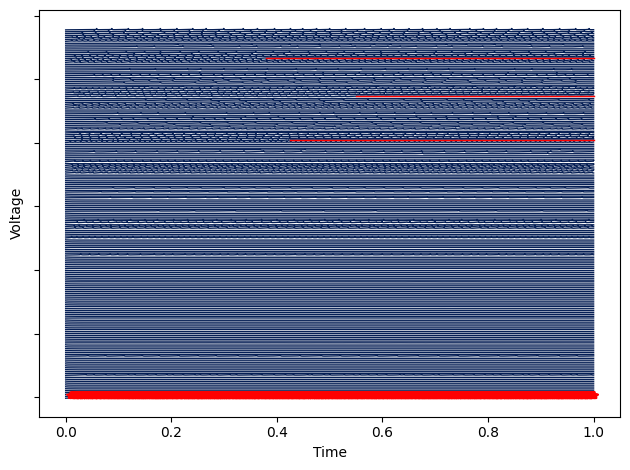

In [8]:
%matplotlib inline
pr.plot_trace_overview(experiment_name="FS-cur-inj-no-syn-no-gj")

Loading FS_network_3-cur-inj/simulation/output-no-syn-no-gj.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 112 113 114 115 116 117 118 119 121 123 124 125 127 128 130 134
 135 136 137 138 140 143 144 145 146 151 153 155 156 159 160 164 166 167
 168 170 172 173 176 178 179 181 183 186 187 188 189 190 192 193 197 198
 199 200 201 210 211 214 215 220 223 226 227 241 262 263 267 269 271 272
 273 275 278 279 284 287 291 310 313 320 322 370 382 508]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


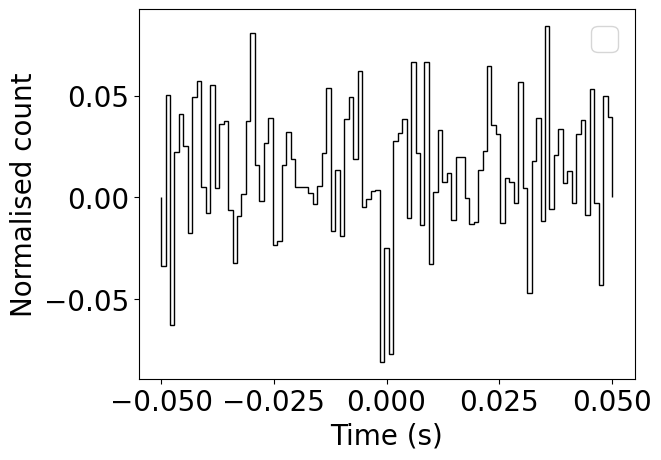

<Axes: xlabel='Time (s)', ylabel='Normalised count'>

<Figure size 640x480 with 0 Axes>

In [9]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-syn-no-gj.hdf5"))
pcc.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-syn-no-gj.png"))

### Adding synapses to the network, and rerunning

In [10]:
output_file_with_syn = os.path.join(network_path, "simulation", "output-no-gj.hdf5")
pr.reenable_synapses(new_output_file=output_file_with_syn)
pr.run()

Re-enabling previously disabled synapses
Running simulation for 1.0 s
Running Neuron simulator 1000 ms, with dt=0.025
1% done. Elapsed: 2.8 s, estimated time left: 280.8 s
33% done. Elapsed: 104.3 s, estimated time left: 211.7 s
62% done. Elapsed: 204.5 s, estimated time left: 125.3 s
94% done. Elapsed: 306.4 s, estimated time left: 19.6 s
99% done. Elapsed: 324.4 s, estimated time left: 3.3 s
Neuron simulation finished
Simulation run time: 327.2 s
Writing network output to FS_network_3-cur-inj/simulation/output-no-gj.hdf5
Using sample dt = None (sample step size None)
Worker 1/1 writing data to FS_network_3-cur-inj/simulation/output-no-gj.hdf5


Loading network info from FS_network_3-cur-inj/network-synapses.hdf5
Loading FS_network_3-cur-inj/simulation/output-no-gj.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 112 113 114 115 116 117 118 119 121 123 124 125 127 128 130 134
 135 136 137 138 140 143 144 145 146 151 153 155 156 159 160 164 166 167
 168 170 172 173 176 178 179 181 183 186 187 188 189 190 192 193 197 198
 199 200 201 210 211 214 215 220 223 226 227 241 262 263 267 269 271 272
 273 275 278 279 284 287 291 310 313 320 322 370 382 508]
WARNING. Depolarisation 

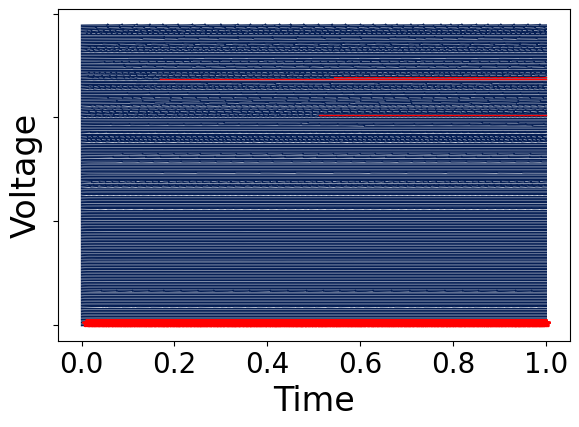

In [11]:
%matplotlib inline
pr.plot_trace_overview(experiment_name="FS-cur-inj-no-gj")

Loading FS_network_3-cur-inj/simulation/output-no-gj.hdf5
Failed sanity check on neuron ID, not all neurons simulated? [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 108
 109 110 112 113 114 115 116 117 118 119 121 123 124 125 127 128 130 134
 135 136 137 138 140 143 144 145 146 151 153 155 156 159 160 164 166 167
 168 170 172 173 176 178 179 181 183 186 187 188 189 190 192 193 197 198
 199 200 201 210 211 214 215 220 223 226 227 241 262 263 267 269 271 272
 273 275 278 279 284 287 291 310 313 320 322 370 382 508]
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


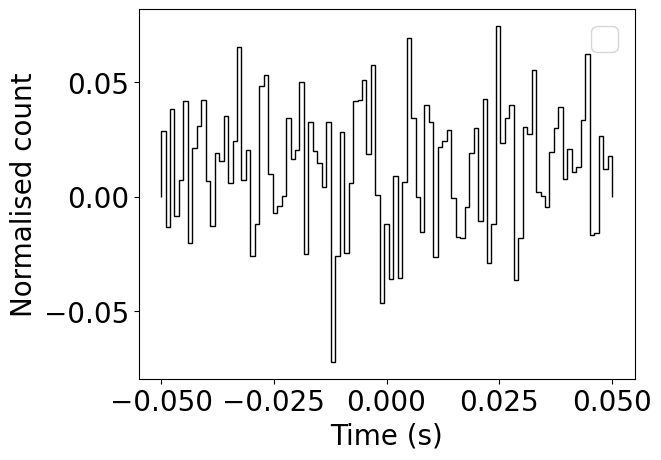

<Axes: xlabel='Time (s)', ylabel='Normalised count'>

<Figure size 640x480 with 0 Axes>

In [12]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-no-gj.hdf5"))
pcc.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-no-gj.png"))

### Also adding gap junctions to the network, and rerunning.

In [13]:
output_file_with_syn_gj = os.path.join(network_path, "simulation", "output-with-syn-and-gj.hdf5")

pr.reenable_gap_junctions(new_output_file=output_file_with_syn_gj)
pr.run()

Re-enabling previously disabled gap junctions
Found 1434 local gap junctions on node.


NEURON: No source_var for target_var sid = 105779

 near line 0
 {pop_section()}
                ^
        finitialize()


RuntimeError: hocobj_call error

The addition of gap junctions to the network synchronises the activity in the network when driven by current injections. It is important to realise that how we drive the network matters, neurons driven by synaptic input would not be synchronised in the same way by gap junctions.

In [ ]:
pr.plot_trace_overview(experiment_name="FS-cur-inj-with-syn-and-gj")

In [ ]:
from snudda.plotting.plot_cross_correlogram import PlotCrossCorrelogram
pcc = PlotCrossCorrelogram(os.path.join(network_path, "simulation", "output-with-syn-and-gj.hdf5"))
pcc.plot_all_pair_cross_correlogram(neuron_id=None, fig_file_name=os.path.join(network_path, "figures", "FS-cross-corr-with-syn-and-gj.png"))